In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('Housing.csv')

In [23]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [24]:
df.shape

(545, 13)

In [25]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [26]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [27]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

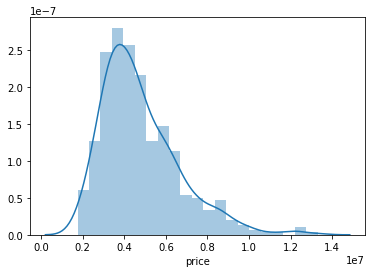

In [28]:
sns.distplot(df['price'])
plt.show()

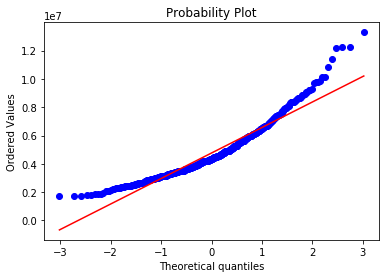

In [29]:
import scipy.stats as stats
stats.probplot(df['price'], plot = plt)
plt.show()

Price seems to have outliers at the higher side. Hence we will transform the price using log.

In [59]:
df['logprice'] = np.log(df['price'])
df['logprice']

0      16.403275
1      16.321036
2      16.321036
3      16.318175
4      16.250001
         ...    
540    14.414347
541    14.384879
542    14.375126
543    14.375126
544    14.375126
Name: logprice, Length: 545, dtype: float64

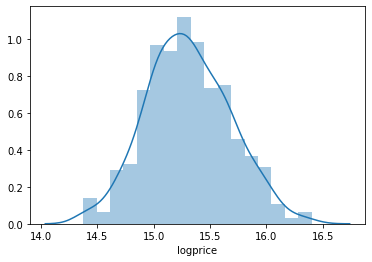

In [60]:
sns.distplot(df['logprice'])
plt.show()

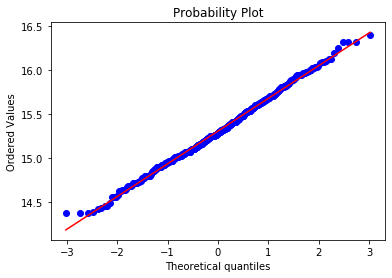

In [61]:
stats.probplot(df['logprice'], plot = plt)
plt.show()

In [30]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [31]:
cat_cols = list(df.select_dtypes(include = 'object'))

In [32]:
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [33]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print('\n')

mainroad
yes    468
no      77
Name: mainroad, dtype: int64


guestroom
no     448
yes     97
Name: guestroom, dtype: int64


basement
no     354
yes    191
Name: basement, dtype: int64


hotwaterheating
no     520
yes     25
Name: hotwaterheating, dtype: int64


airconditioning
no     373
yes    172
Name: airconditioning, dtype: int64


prefarea
no     417
yes    128
Name: prefarea, dtype: int64


furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64




In [34]:
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [35]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
price                              545 non-null int64
area                               545 non-null int64
bedrooms                           545 non-null int64
bathrooms                          545 non-null int64
stories                            545 non-null int64
parking                            545 non-null int64
mainroad_yes                       545 non-null uint8
guestroom_yes                      545 non-null uint8
basement_yes                       545 non-null uint8
hotwaterheating_yes                545 non-null uint8
airconditioning_yes                545 non-null uint8
prefarea_yes                       545 non-null uint8
furnishingstatus_semi-furnished    545 non-null uint8
furnishingstatus_unfurnished       545 non-null uint8
dtypes: int64(6), uint8(8)
memory usage: 29.9 KB


## Build Statistical Model

In [62]:
X = df.drop(['price', 'logprice'], axis = 1)
y = df['logprice']

In [63]:
import statsmodels.api as sm
xc  = sm.add_constant(X)

result = sm.OLS(y,xc).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     94.84
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          4.20e-129
Time:                        14:44:44   Log-Likelihood:                 93.010
No. Observations:                 545   AIC:                            -158.0
Df Residuals:                     531   BIC:                            -97.81
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              14.3524      0.051    280.577      0.000      14.252      14.453
area                             4.949e-05    4.7e-06     10.528      0.000    4.03e-05    5.87e-05
bedrooms                            0.0295      0.014      2.098      0.036       0.002       0.057
bathrooms                           0.1632      0.020      8.159      0.000       0.124       0.203
stories                             0.0901      0.012      7.258      0.000       0.066       0.115
parking                             0.0448      0.011      3.953      0.000       0.023       0.067
mainroad_yes                        0.1175      0.028      4.268      0.000       0.063       0.172
guestroom_yes                       0.0698      0.025      2.738      0.006       0.020       0.120
basement_yes                        0.0893      0.021      4.185      0.000       0.047       0.131
hotwaterheating_yes                 0.1634      0.043      3.784      0.000       0.079       0.248
airconditioning_yes                 0.1748      0.021      8.336      0.000       0.134       0.216
prefarea_yes                        0.1268      0.022      5.661      0.000       0.083       0.171
furnishingstatus_semi-furnished     0.0180      0.023      0.796      0.426      -0.026       0.062
furnishingstatus_unfurnished       -0.1099      0.024     -4.500      0.000      -0.158      -0.062
==============================================================================
Omnibus:                        3.203   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                3.363
Skew:                          -0.082   Prob(JB):                        0.186
Kurtosis:                       3.348   Cond. No.                     3.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif = [vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vif, xc.columns, columns = ['vif'])

,vif
const,33.384521
area,1.325250
bedrooms,1.369477
bathrooms,1.286621
stories,1.478055
parking,1.212837
mainroad_yes,1.172728
guestroom_yes,1.212838
basement_yes,1.323050
hotwaterheating_yes,1.041506


In [65]:
X = df.drop(['logprice', 'price', 'furnishingstatus_semi-furnished'], axis = 1)
y = df['logprice']

In [66]:
import statsmodels.api as sm
xc  = sm.add_constant(X)

result = sm.OLS(y,xc).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     102.8
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          5.55e-130
Time:                        14:45:14   Log-Likelihood:                 92.684
No. Observations:                 545   AIC:                            -159.4
Df Residuals:                     532   BIC:                            -103.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           14.3663      0.048    299.077      0.000      14.272      14.461
area                          4.937e-05    4.7e-06     10.511      0.000    4.01e-05    5.86e-05
bedrooms                         0.0296      0.014      2.108      0.035       0.002       0.057
bathrooms                        0.1629      0.020      8.147      0.000       0.124       0.202
stories                          0.0899      0.012      7.246      0.000       0.066       0.114
parking                          0.0445      0.011      3.933      0.000       0.022       0.067
mainroad_yes                     0.1165      0.027      4.239      0.000       0.063       0.171
guestroom_yes                    0.0691      0.025      2.714      0.007       0.019       0.119
basement_yes                     0.0893      0.021      4.186      0.000       0.047       0.131
hotwaterheating_yes              0.1641      0.043      3.803      0.000       0.079       0.249
airconditioning_yes              0.1733      0.021      8.301      0.000       0.132       0.214
prefarea_yes                     0.1261      0.022      5.640      0.000       0.082       0.170
furnishingstatus_unfurnished    -0.1215      0.020     -6.211      0.000      -0.160      -0.083
==============================================================================
Omnibus:                        3.520   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.776
Skew:                          -0.086   Prob(JB):                        0.151
Kurtosis:                       3.369   Cond. No.                     3.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
X = df.drop(['logprice','price', 'furnishingstatus_semi-furnished'], axis = 1)
y = df['logprice']

In [68]:
xc  = sm.add_constant(X)

result = sm.OLS(y,xc).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     102.8
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          5.55e-130
Time:                        14:46:04   Log-Likelihood:                 92.684
No. Observations:                 545   AIC:                            -159.4
Df Residuals:                     532   BIC:                            -103.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           14.3663      0.048    299.077      0.000      14.272      14.461
area                          4.937e-05    4.7e-06     10.511      0.000    4.01e-05    5.86e-05
bedrooms                         0.0296      0.014      2.108      0.035       0.002       0.057
bathrooms                        0.1629      0.020      8.147      0.000       0.124       0.202
stories                          0.0899      0.012      7.246      0.000       0.066       0.114
parking                          0.0445      0.011      3.933      0.000       0.022       0.067
mainroad_yes                     0.1165      0.027      4.239      0.000       0.063       0.171
guestroom_yes                    0.0691      0.025      2.714      0.007       0.019       0.119
basement_yes                     0.0893      0.021      4.186      0.000       0.047       0.131
hotwaterheating_yes              0.1641      0.043      3.803      0.000       0.079       0.249
airconditioning_yes              0.1733      0.021      8.301      0.000       0.132       0.214
prefarea_yes                     0.1261      0.022      5.640      0.000       0.082       0.170
furnishingstatus_unfurnished    -0.1215      0.020     -6.211      0.000      -0.160      -0.083
==============================================================================
Omnibus:                        3.520   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.776
Skew:                          -0.086   Prob(JB):                        0.151
Kurtosis:                       3.369   Cond. No.                     3.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation of Model Summary

r-squared: 68% of variation in price explained by the model

f-statistics: H0: barea = bbathroom = ballvariables
              ha: atleast one differs
So, here the value of f-stats is 103 which is very high than 0.05(alpha) so we conclude that we will reject the null hypothesis.

log-likelihood is higher the better

AIC and BIC is lower the better

barea: prob=0.0000 Ho : barea = 0 and Ha : barea != 0 so we reject the null hypothesis.

## Adding polynomial features to improve model performance

In [79]:
X = df.drop(['logprice', 'price'], axis = 1)
y = df['logprice']

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures()

xt = pf.fit_transform(X)

cols = pf.get_feature_names(X.columns)

xt = pd.DataFrame(xt, columns = cols)

In [81]:
xt.head().T

,0,1,2,3,4
1,1.0,1.0,1.0,1.0,1.0
area,7420.0,8960.0,9960.0,7500.0,7420.0
bedrooms,4.0,4.0,3.0,4.0,4.0
bathrooms,2.0,4.0,2.0,2.0,1.0
stories,3.0,4.0,2.0,2.0,2.0
...,...,...,...,...,...
prefarea_yes furnishingstatus_semi-furnished,0.0,0.0,1.0,0.0,0.0
prefarea_yes furnishingstatus_unfurnished,0.0,0.0,0.0,0.0,0.0
furnishingstatus_semi-furnished^2,0.0,0.0,1.0,0.0,0.0
furnishingstatus_semi-furnished furnishingstatus_unfurnished,0.0,0.0,0.0,0.0,0.0


In [82]:
xt.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 105 columns):
1                                                               float64
area                                                            float64
bedrooms                                                        float64
bathrooms                                                       float64
stories                                                         float64
parking                                                         float64
mainroad_yes                                                    float64
guestroom_yes                                                   float64
basement_yes                                                    float64
hotwaterheating_yes                                             float64
airconditioning_yes                                             float64
prefarea_yes                                                    float64
furnishingstatus_semi-furnishe

In [83]:
polyresult = sm.OLS(y, xt).fit()
polyresult.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     15.57
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           2.26e-95
Time:                        15:17:34   Log-Likelihood:                 162.96
No. Observations:                 545   AIC:                            -133.9
Df Residuals:                     449   BIC:                             279.0
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
1                                                               14.2779      0.227     62.776      0.000      13.831      14.725
area                                                             0.0001   3.25e-05      3.208      0.001    4.04e-05       0.000
bedrooms                                                         0.1396      0.101      1.387      0.166      -0.058       0.337
bathrooms                                                       -0.0513      0.169     -0.304      0.761      -0.383       0.280
stories                                                          0.1095      0.105      1.044      0.297      -0.097       0.316
parking                                                          0.0027      0.085      0.032      0.975      -0.165       0.171
mainroad_yes                                                    -0.0312      0.079     -0.394      0.694      -0.187       0.124
guestroom_yes                                                    0.0893      0.095      0.940      0.348      -0.097       0.276
basement_yes                                                     0.0924      0.071      1.298      0.195      -0.047       0.232
hotwaterheating_yes                                             -0.0780      0.150     -0.519      0.604      -0.373       0.217
airconditioning_yes                                              0.1027      0.071      1.442      0.150      -0.037       0.243
prefarea_yes                                                    -0.1728      0.109     -1.583      0.114      -0.387       0.042
furnishingstatus_semi-furnished                                  0.0155      0.069      0.225      0.822      -0.120       0.151
furnishingstatus_unfurnished                                    -0.0982      0.068     -1.442      0.150      -0.232       0.036
area^2                                                       -3.783e-09   1.61e-09     -2.355      0.019   -6.94e-09   -6.26e-10
area bedrooms                                                -7.275e-06   9.28e-06     -0.784      0.433   -2.55e-05     1.1e-05
area bathrooms                                                1.605e-05   1.21e-05      1.329      0.184   -7.68e-06    3.98e-05
area stories                                                 -2.938e-06   8.97e-06     -0.328      0.743   -2.06e-05    1.47e-05
area parking                                                 -4.442e-06   6.42e-06     -0.692      0.489   -1.71e-05    8.17e-06
area mainroad_yes                                             8.119e-06   2.38e-05      0.341      0.734   -3.87e-05     5.5e-05
area guestroom_yes                                           -5.367e-05   1.89e-05     -2.839      0.005   -9.08e-05

In [84]:
cols = xt.columns.tolist()

while(len(cols) > 0):
    x_1 = xt[cols]
    model = sm.OLS(y, x_1).fit()
    p = pd.Series(model.pvalues.values, index = cols)
    pmax = max(p)
    features_max_p = p.idxmax()
    
    if(pmax > 0.05):
        cols.remove(features_max_p)
    else:
        break

In [85]:
print(len(cols))
print(cols)

28
['1', 'area', 'basement_yes', 'airconditioning_yes', 'furnishingstatus_unfurnished', 'area^2', 'area bathrooms', 'area guestroom_yes', 'area furnishingstatus_semi-furnished', 'bedrooms parking', 'bedrooms mainroad_yes', 'bedrooms hotwaterheating_yes', 'bathrooms furnishingstatus_semi-furnished', 'bathrooms furnishingstatus_unfurnished', 'stories^2', 'parking^2', 'parking mainroad_yes', 'mainroad_yes prefarea_yes', 'guestroom_yes basement_yes', 'guestroom_yes airconditioning_yes', 'guestroom_yes prefarea_yes', 'basement_yes^2', 'basement_yes airconditioning_yes', 'hotwaterheating_yes airconditioning_yes', 'hotwaterheating_yes furnishingstatus_unfurnished', 'airconditioning_yes^2', 'furnishingstatus_semi-furnished furnishingstatus_unfurnished', 'furnishingstatus_unfurnished^2']


In [86]:
polyresult = sm.OLS(y, x_1[cols]).fit()
polyresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     63.93
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          2.07e-135
Time:                        15:23:03   Log-Likelihood:                 131.25
No. Observations:                 545   AIC:                            -214.5
Df Residuals:                     521   BIC:                            -111.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
1                                                               14.5645      0.050    290.973      0.000      14.466      14.663
area                                                          9.647e-05   1.67e-05      5.786      0.000    6.37e-05       0.000
basement_yes                                                     0.0558      0.012      4.482      0.000       0.031       0.080
airconditioning_yes                                              0.0925      0.013      7.017      0.000       0.067       0.118
furnishingstatus_unfurnished                                    -0.1485      0.026     -5.658      0.000      -0.200      -0.097
area^2                                                       -4.525e-09   1.12e-09     -4.051      0.000   -6.72e-09   -2.33e-09
area bathrooms                                                1.435e-05   3.84e-06      3.738      0.000    6.81e-06    2.19e-05
area guestroom_yes                                           -2.089e-05   8.04e-06     -2.597      0.010   -3.67e-05   -5.08e-06
area furnishingstatus_semi-furnished                         -1.414e-05   6.51e-06     -2.174      0.030   -2.69e-05   -1.36e-06
bedrooms parking                                                 0.0241      0.010      2.488      0.013       0.005       0.043
bedrooms mainroad_yes                                            0.0277      0.008      3.403      0.001       0.012       0.044
bedrooms hotwaterheating_yes                                     0.0746      0.015      4.846      0.000       0.044       0.105
bathrooms furnishingstatus_semi-furnished                        0.0742      0.026      2.846      0.005       0.023       0.125
bathrooms furnishingstatus_unfurnished                           0.1516      0.040      3.777      0.000       0.073       0.230
stories^2                                                        0.0176      0.003      6.852      0.000       0.013       0.023
parking^2                                                       -0.0480      0.014     -3.417      0.001      -0.076      -0.020
parking mainroad_yes                                             0.0709      0.035      2.021      0.044       0.002       0.140
mainroad_yes prefarea_yes                                        0.1612      0.025      6.568      0.000       0.113       0.209
guestroom_yes basement_yes                                       0.1744      0.049      3.529      0.000       0.077       0.271
guestroom_yes airconditioning_yes                                0.1577      0.050      3.179      0.002       0.060       0.255
guestroom_yes prefarea_yes                                      -0.1031      0.050     -2.070      0.039      -0.201

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(y, x_1[cols], test_size = 0.3, random_state = 1)

In [92]:
polyresult = sm.OLS(y_train, X_train).fit()

y_train_pred = polyresult.predict(X_train)
y_test_pred = polyresult.predict(X_test)


from sklearn.metrics import r2_score, mean_squared_error

print('R-squared of Train Data:', r2_score(y_train, y_train_pred))
print('RMSE of Train Data:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('R-squared of Test Data:', r2_score(y_test, y_test_pred))
print('RMSE of Test Data:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared of Train Data: 0.04585287446298981
RMSE of Train Data: 5930472.22272001
R-squared of Test Data: 0.04095175244015644
RMSE of Test Data: 4523278.1888254285


## Assumption

Assumption-1 Normality of Residuals

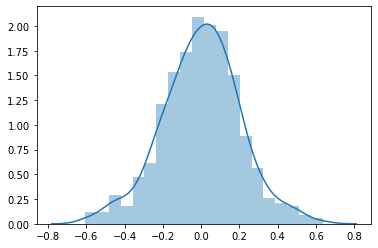

In [69]:
residuals = result.resid
sns.distplot(residuals)
plt.show()

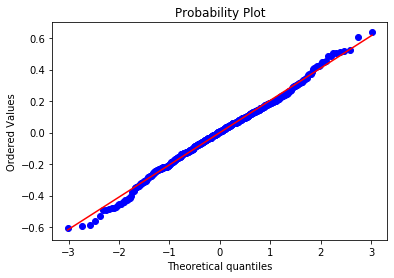

In [70]:
stats.probplot(residuals, plot = plt)
plt.show()

In [71]:
print(stats.jarque_bera(residuals))

(3.7756317156542956, 0.15140213174996608)


We will accept the null hypothesis that residuals is Normal

Assumption-2 Homoscedacticity

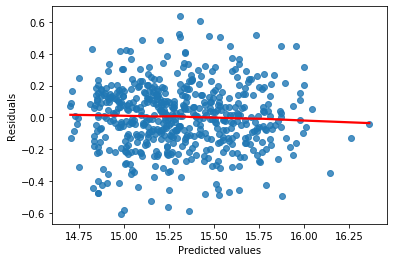

In [74]:
residuals = result.resid
y_pred = result.predict(xc)

sns.regplot(x = y_pred, y=residuals, lowess = True, line_kws={'color': 'red'})
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [76]:

## H0: Residual Variance is constant across the range of data 
## H1: Residual Variance is not constant across the range of data

import statsmodels.stats.api as sms

test = sms.het_goldfeldquandt(y=residuals, x=xc)
test

(1.0380954485771878, 0.38173634287296504, 'increasing')

We will accept the null hypothesis i.e residuals variance is constant across the range of data.

Assumption-3 Autocorrelation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


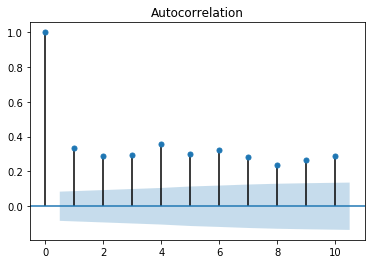

In [77]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residuals, lags = 10)
acf.show()

The value of Durbin Watson is 1.3 which is less than 2 so we can conclude that there is no Autocorrelation in the model.

Assumption-4 Linearity of Relationships

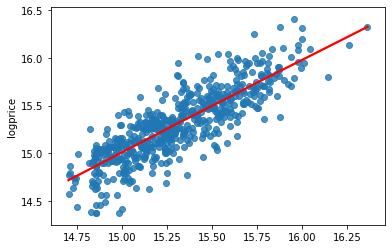

In [78]:
y_pred = result.predict(xc)

sns.regplot(x = y_pred, y = y, lowess = True, line_kws = {'color': 'red'})
plt.show()

This model shows the linear relationships

## Model building using Machine Learning Approach

In [93]:
from sklearn.linear_model import LinearRegression

X = df.drop(['price', 'logprice'], axis =1)
y = df['logprice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =1)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('R-squared of Train Data:', r2_score(y_train, y_pred_train))
print('RMSE of Train Data:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

print('R-squared of Test Data:', r2_score(y_test, y_pred_test))
print('RMSE of Test Data:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R-squared of Train Data: 0.7036861890139563
RMSE of Train Data: 0.19754491022596343
R-squared of Test Data: 0.6690328794181717
RMSE of Test Data: 0.22519768052107095


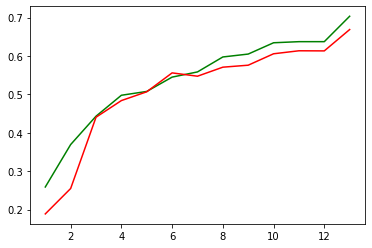

In [96]:
from sklearn.feature_selection import RFE
no_cols = X.shape[1]
r2_train_score = []
r2_test_score = []
nvars = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
for n in range(no_cols):
    lr = LinearRegression()
    rfe = RFE(lr, n+1)
    
    nvars.append(n+1)
    rfe.fit(X_train, y_train)
    y_train_pred = rfe.predict(X_train)
    y_test_pred = rfe.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_train_score.append(r2_train)
    r2_test = r2_score(y_test, y_test_pred)
    r2_test_score.append(r2_test)
    
plt.plot(nvars, r2_train_score, color='g')
plt.plot(nvars, r2_test_score, color='r')
plt.show()

## Regualrization

## Lasso OR L1 Norm

In [104]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV, ElasticNet

In [112]:
n_alphas = 500
alphas = np.logspace(-10, 0, n_alphas)

lasso_cv = LassoCV(alphas = alphas, cv = 3, random_state = 1)

lasso_cv.fit(X,y)

print(lasso_cv.alpha_)

1e-10


In [113]:
lasso = Lasso(alpha = 1e-10)

lasso.fit(X,y)

pd.DataFrame(lasso.coef_, X.columns, columns = ['Coeffs'])

,Coeffs
area,0.000049
bedrooms,0.029472
bathrooms,0.163204
stories,0.090131
parking,0.044772
mainroad_yes,0.117473
guestroom_yes,0.069789
basement_yes,0.089313
hotwaterheating_yes,0.163424
airconditioning_yes,0.174807


In [114]:
y_pred = lasso.predict(X)

r2_score(y, y_pred)

0.698964084121739

## Ridge

In [118]:
n_alphas = 100

alphas = np.logspace(-4, 3, n_alphas)

ridge = RidgeCV(alphas = alphas, cv = 3)

ridge.fit(X, y)

ridge.alpha_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.0001

In [119]:
ridge = Ridge(alpha = 0.0001)
ridge.fit(X,y)

pd.DataFrame(ridge.coef_, X.columns, columns = ['Coeffs'])

,Coeffs
area,0.000049
bedrooms,0.029472
bathrooms,0.163204
stories,0.090131
parking,0.044773
mainroad_yes,0.117473
guestroom_yes,0.069789
basement_yes,0.089313
hotwaterheating_yes,0.163424
airconditioning_yes,0.174807


In [120]:
y_pred = ridge.predict(X)

r2_score(y, y_pred)

0.6989640841214582